# Project IV - MNIST Image Classification

In this project we are going to create a very simple neural network (linear classifier) to identify the handwritten digits from the MNIST database - often considered the "Hello World" problem in neural networks. In this problem we are given grayscale images of size 28 × 28 showing handwritten digits and are going to classify them into the 10 classes 0 - 9, depending on the digit depicted in the image. The MNIST database consists of 60.000 images to train your network on and 10.000 images to test the quality (accuracy) of the resulting network. For all images the correct label 0 - 9 is part of the database. There exist many of-the-shelf modules for this problem in Python, e.g. Keras, TensorFlow, scikit, and PyTorch, but in this project we are going to build a solution using pure Python from scratch.

A good introduction to the topic are the following four videos from the YouTube channel by 3BLUE1BROWN: Neural Network (19:13), Gradient Descend (21:00), Backpropagation (13:53), and Backpropagation Calculus (10:17). The few mathematical equations required in this project for performing simple backpropagation are stated explicitly below.

You are not allowed to use NumPy, Keras, etc. in the questions below (if not stated otherwise).

The first group of tasks concerns reading the raw data and visualizing them.

1. From yann.lecun.com/exdb/mnist/ download the following four files:

        t10k-images.idx3-ubyte.gz (1.6 MB)
        t10k-labels.idx1-ubyte.gz (4.4 KB)
        train-images.idx3-ubyte.gz (9.6 MB)
        train-labels.idx1-ubyte.gz (28.3 KB)

2. Make a function read_labels(filename) to read a file containing labels (integers 0-9) in the format described under FILE FORMATS FOR THE MNIST DATABASE. The function should return a list of integers. Test your method on the files t10k-labels.idx1-ubyte.gz and train-labels.idx1-ubyte.gz (the first five values of the 10.000 values in t10k-labels.idx1-ubyte.gz are [7, 2, 1, 0, 4]). The function should check if the magic number of the file is 2049.

Hint: Open the files for reading in binary mode by providing open with the argument 'rb'. You can either uncompress the files using a program like 7zip, or work directly with the compressed files using the gzip module in Python. In particular gzip.open will be relevant. To convert 4 bytes to an integer int.from_bytes might become useful.

3. Make a function read_images(filename) to read a file containing MNIST images in the format described under FILE FORMATS FOR THE MNIST DATABASE. Test your method on the files t10k-images.idx3-ubyte.gz and train-images.idx3-ubyte.gz. The function should return a three dimensional list of integers, such that images[image][row][column] is a pixel value (an integer in the range 0..255), and 0 ≤ row, column < 28 and 0 ≤ image < 10000 for t10k-images.idx3-ubyte.gz. The function should check if the magic number of the file is 2051.

4. Make a function plot_images(images, labels) to show a set of images and their corresponding labels as titles using imshow from matplotlib.pyplot. Show the first few images from t10k-images.idx3-ubyte.gz with their labels from t10k-labels.idx1-ubyte.gz as titles. Remember to select an appropriate colormap for imshow.

A linear classifier consists of a pair (A, b), where A is a weight matrix of size 784 × 10 and b is a bias vector of length 10. An image containing 28 × 28 pixels is viewed as a vector x of length 784 (= 28 · 28), where the pixel values are scaled to be floats in the range [0, 1]. In the following we denote this representation an image vector. The prediction by the classifier is computed as

a = xA + b,

where a = (a0, ..., a9), i.e. the result of the vector-matrix product xA, that results in a vector of length 10, followed by a vector-vector addition with b. The predicted class is the index i, such that ai is the largest entry in a.

In the follow we will apply the cost measure mean squared error to evalutate how close the output a = xA + b of a network (A, b) is for an input x to the correct answer y, where we assume that y is the categorical vector of length 10 for the correct label, i.e. yi = 1 if i = label, and 0 otherwise:

cost(a, y) = sumi ((ai − yi)2) / 10

We use the mean squared error because is has an easy computable derivative, although better cost functions exist for this learning problem, e.g. softmax.

Below you will be asked to compute weights (A, b) using back propagation. To get started, a set of weights (A, b) is available as mnist_linear.weights. The weights were generated using the short program mnist_keras_linear.py using the neural networks API Keras running on top of Google's TensorFlow. The network achieves around 92% accuracy on the MNIST test set (you should not expect to reach this level, since this network is trained using the softmax cost function).

5. Optional: You should be able to reproduce a similar weight file (but not exactly the same) by runing the script, after pip installing tensorflow. This is not part of the project.

The second group of tasks is to load and save existing linear classifier networks and to evaluate their performance, together with various helper functions. In the following we assume the vector b to be represented by a standard Python list of floats and the matrix A to be represented by a list-of-lists of floats.

6. Write functions linear_load(filename) and linear_save(filename, network) to load and save a linear classifier network = (A, b) using JSON. Test your functions on mnist_linear.weights.

7. Write function image_to_vector(image) that converts an image (list-of-lists) with integer pixel values in the range [0, 255] to an image vector (list) with pixel values being floats in the range [0, 1].

8. Write functions for basic linear algebra add(U, V), sub(U, V), scalar_multiplication(scalar, V) multiply(V, M), transpose(M) where V and U are vectors and M is a matrix. Include assertions to check if the dimensions of the arguments to add and multiply fit.

9. Write a function mean_square_error(U, V) to compute the mean squared error between two vectors.

Examples: mean_square_error([1,2,3,4], [3,1,3,2]) shoule return 2.25.

10. Write function a function argmax(V) that returns an index into the list V with maximal value (corresponding to numpy.argmax).

Example: argmax([6, 2, 7, 10, 5]) should return 3.

11. Implement a function categorical(label, classes=10) that takes a label from [0, 9] and returns a vector of length classes, with all entries being zero, except entry label that equals one. For an image with this label, the categorical vector is the expected ideal output of a perfect network for the image.

Example: categorical(3) should return [0,0,0,1,0,0,0,0,0,0].

12. Write a function predict(network, image) that returns xA + b, given a network (A, b) and an image vector.

13. Create a function evaluate(network, images, labels) that given a list of image vectors and corresponding labels, returns the tuple (predictions, cost, accuracy), where predictions is a list of the predicted labels for the images, cost is the average of mean square errors over all input-output pairs, and accuracy the fraction of inputs where the predicted labels are correct. Apply this to the loaded network and the 10.000 test images in t10k-images. The accuracy should be around 92%, whereas the cost should be 230 (the cost is very bad since the network was trained to optimze the cost measure softmax).

Hint. Use your argmax function to convert network output into a label prediction.

14. Extend plot_images to take an optional argument prediction that is a list of predicted labels for the images, and visualizes if the prediction is correct or wrong. Test it on a set of images from t10k-images and their correct labels from t10k-labels.

15. Column i of matrix A contains the (positive or negative) weight of each input pixel for class i, i.e. the contribution of the pixels towards the image showing the digit i. Use imshow to visualize each column (each column is a vector of length 784 that should be reshaped to an image of size 28 × 28).

The third group of tasks is to train your own linear classifier network, i.e. to compute a matrix A and a vector b.

16. Create function create_batches(values, batch_size) that partitions a list of values into batches of size batch_size, except for the last batch, that can be smaller. The list should be permuted before being cut into batches.

Example: create_batches(list(range(7)), 3) should return [[3, 0, 1], [2, 5, 4], [6]].

17. Create a function update(network, images, labels) that updates the network network = (A, b) given a batch of n image vectors and corresponding output labels (performs one step of a stochastical gradient descend in the 784 · 10 + 10 = 7850 dimensional space where all entries of A and b are considered to be variables).

For each input in the batch, we consider the tuple (x, a, y), where x is the image vector, a = xA + b the current network's output on input x, and y the corresponding categorical vector for the label. The biases b and weights A are updated as follows:

bj &minus;= σ · (1 / n) · ∑(x,a,y) 2 · (aj − yj) / 10

Aij &minus;= σ · (1 / n) · ∑(x,a,y) xi · 2 · (aj − yj) / 10

For this problem an appropriate value for the step size σ of the gradient descend is σ = 0.1.

In the above equations 2 · (aj −yj) / 10 is the derivative of the cost function (mean squared error) wrt. to the output aj, whereas xi · 2 · (aj − yj) / 10 is the derivative of the cost function w.r.t. to Aij — both for a specific image (x, a, y).

18. Create a function learn(images, labels, epochs, batch_size) to train an initially random network on a set of image vectors and labels. First initialize the network to contain random weights: each value of b to be a uniform random value in [0, 1], and each value in A to be a uniform random value in [0, 1 / 784]. Then perform epochs epochs, each epoch consiting of partitioning the input into batches of batch_size images, and calling update with each of the batches. Try running your learning function with epochs=5 and batch_size=100 on the MNIST training set train-images and train-labels.

Hint. The above computation can take a long time, so print regularly a status of the current progress of the network learning, e.g. by evaluating the network on (a subset of) the test images t10k-images. Regularly save the best network seen so far.

Here are some additional optional tasks. Feel free to come up with your own (other networks, other optimization strategies, other loss functions, ...).

19. Optional. Instead of using the mean squared error as the cost function try to use the categorical cross entropy (see e.g. this blog): On output a where the expected output is the categorical vector y, the categorical cross entropy is defined as CE(y, softmax(a)), where softmax(a)i = eai / (∑j eaj) and the cross entropy is defined as CE(y, â) = − ∑i (yi · log âi).

In update the derivative of the cost function w.r.t. output aj should be replaced by eaj /(∑k eak) − yj.

Note. softmax(a) is a vector with the same length as a with values having the same relative order as in a, but elements are scalled so that softmax(a)i ∈ ]0,1[ and 1 = ∑i softmax(a)i. Furthermore, since y is categorical with yi = 1 for exactly one i, CE(y, softmax(a)) = log(∑j eaj) − ai.

20. Optional. Visualize the changing weights, cost, and accuracy during the learning.

Hint. You can use matplotlib.animation.FuncAnimation, and let the provided function apply one batch of training data to the network for each call.

21. Optional: Redo the above exercises in Numpy. Create a generic method for reading IDX files into NumPy arrays based on the specification THE IDX FILE FORMAT. Data can be read from a file directly into a NumPy array using numpy.fromfile and an appropriate dtype.

Hint. np.argmax(test_images.reshape(10000, 28 * 28) @ A + b, axis=1) computes the predictions for all tests images, if they are all in one NumPy array with shape (10000, 28, 28).

22. Optional: Compare your pure Python solution with your Numpy implementation (if you did the above optional task) and/or the solution using Keras, e.g. on running time, accuracy achieved, epochs.

23. Optional: Try to take a picture of your own handwritten letters and see if your program can classify your digits. It is important that you preprocess your images to the same nomalized format as the original MNIST data: Images should be 28 × 28 pixels where each pixel is represented by an 8-bit greyscale value where 255 is black and 0 is white. The center of mass should be in the center of the image. In the test data all images were first scaled to fit in a 20 × 20 box, and then padded with eight rows and columns with zeros to make the center of mass the center of the image, see yann.lecun.com/exdb/mnist.

Hint: PIL.Image.resize from the Pillow (Python Imaging Library) might be usefull. Remember to set the resampling filter to BILINEAR.

# Students:
201906235 Pernille Højlund Brams


201908918 Anna Hedvig Møller Daugaard


201907685 Søren Orm Hansen

In [6]:
''' ---- TODO CONFIGURE YOUR DIRPATH ----

Chunk for configuring the dirpath variable to be used throughout the code.

This should be /path/to/MNIST, such that 'MNIST' (or whatever you name your folder) is the name of the folder with the files downloaded in part 1. above.
'''

# Put path here - I put my own for now. The path should not include a slash at the end. (Note that this path and ones throughout are configured on a mac)
dirpath = "/Users/pernillebrams/Desktop/UNI/PythonKursus/Python_Assignments/MNIST"

1. From yann.lecun.com/exdb/mnist/ download the following four files:

        t10k-images.idx3-ubyte.gz (1.6 MB)
        t10k-labels.idx1-ubyte.gz (4.4 KB)
        train-images.idx3-ubyte.gz (9.6 MB)
        train-labels.idx1-ubyte.gz (28.3 KB)

2. Make a function read_labels(filename) to read a file containing labels (integers 0-9) in the format described under FILE FORMATS FOR THE MNIST DATABASE. The function should return a list of integers. Test your method on the files t10k-labels.idx1-ubyte.gz and train-labels.idx1-ubyte.gz (the first five values of the 10.000 values in t10k-labels.idx1-ubyte.gz are [7, 2, 1, 0, 4]). The function should check if the magic number of the file is 2049.

In [7]:
def check_magic_number(number, answer):
    '''
    Function for checking magic number. 

    Will halt the read_labels() and raise an error if magic number is incorrect.

    '''
    # Assertion statement for the magic number to be correct
    assert number == int(answer), f"The magic number is not {answer}, but {number}"
    
    print(f"The magic number is indeed {answer}, as it should.")


In [8]:
def read_labels(filename):
    """Function for reading labels. Uses function check_magic_number() created above.
    
    Input: filename.
    
    Output: list of labels.
    
    Other: Prints magic number and number of labels using check_magic_number().
    """
    
    # The expression 'rb' means "read binary"
    with open(filename, 'rb') as file:

        # Seek offsets the file by 2 because the two first are zeros
        file.seek(2)
        
        # Magic number stored as hex, so we acquire it with int.from_bytes
        magic = int.from_bytes(file.read(2), 'big')

        # Checking whether the magic number is right with our function
        check_magic_number(magic, 2049)
       
        # Number of items stored as hex
        no_Items = int.from_bytes(file.read(4), 'big')
        print(f'There are {no_Items} items in the file {filename}.')
        
        # Labels stored as the rest of the file
        labels = list(file.read())
        
        # We only want to return the items, if the information is correct
        if len(labels) == no_Items:
            return labels

''' Testing the function '''
# Reading in
test_labels_ = read_labels(f"{dirpath}/t10k-labels.idx1-ubyte")
train_labels_ = read_labels(f"{dirpath}/train-labels.idx1-ubyte")

# Including an assertion statement as per the problem statement, checking the labels in the test set.
assert test_labels_[0:5] == [7, 2, 1, 0, 4], f"The first 5 values oft10k-labels.idx1-ubyte is not right. It is {test_labels_[0:5]} and should be [7, 2, 1, 0, 4]."
print(f"The first 5 values of t10k-labels.idx1-ubyte is {test_labels_[0:5]}.")


The magic number is indeed 2049, as it should.
There are 10000 items in the file /Users/pernillebrams/Desktop/UNI/PythonKursus/Python_Assignments/MNIST/t10k-labels.idx1-ubyte.
The magic number is indeed 2049, as it should.
There are 60000 items in the file /Users/pernillebrams/Desktop/UNI/PythonKursus/Python_Assignments/MNIST/train-labels.idx1-ubyte.
The first 5 values of t10k-labels.idx1-ubyte is [7, 2, 1, 0, 4].


3. Make a function read_images(filename) to read a file containing MNIST images in the format described under FILE FORMATS FOR THE MNIST DATABASE. Test your method on the files t10k-images.idx3-ubyte.gz and train-images.idx3-ubyte.gz. The function should return a three dimensional list of integers, such that images[image][row][column] is a pixel value (an integer in the range 0..255), and 0 ≤ row, column < 28 and 0 ≤ image < 10000 for t10k-images.idx3-ubyte.gz. The function should check if the magic number of the file is 2051.

In [9]:
def list_split(listA, n):
    '''Function for splitting list. Found here: https://appdividend.com/2021/06/15/how-to-split-list-in-python/ '''
    for x in range(0, len(listA), n):
        every_chunk = listA[x: n+x]
        if len(every_chunk) < n:
            every_chunk = every_chunk + \
                [None for y in range(n-len(every_chunk))]
        yield every_chunk

def read_images(filename):
    """Function for reading images.
    
    Input: filename.
    
    Output: Images as list of lists (with dim: nrow X ncol).
    
    Other: Prints magic number, number of images, number of rows and number of colums.
    """
    
    with open(filename, 'rb') as file:

        # Seeking offsets the file by 2, because the two first are zeros
        file.seek(2)
        
        # Magic number stored as hex, so we acquire it with int.from_bytes
        magic = int.from_bytes(file.read(2), 'big')

        # Checking whether the magic number is right with our function
        check_magic_number(magic, 2051)
        
        # Number of items is also stored as hex
        no_Items = int.from_bytes(file.read(4), 'big')
        print(f'There are {no_Items} items in the file {filename}.')
        
        # Number of rows in each image is also stored as hex
        nrow = int.from_bytes(file.read(4), 'big')
        print(f'There are {nrow} rows in each image.')
        
        # Number of columns in each image is also stored as hex
        ncol = int.from_bytes(file.read(4), 'big')
        print(f'There are {ncol} columns in each image.')
        
        # Storing the rest of the data with .read()
        data = list(file.read())
        
        # The list of images is split into equal parts of length 28*28
        images = list(list_split(data, 28*28))
        
        # Returning each image split into 28 rows
        return [list(list_split(image, 28)) for image in images]

''' Testing the function on t10k-images.idx3-ubyte.gz and train-images.idx3-ubyte.gz'''
# Reading both. Assertion statements are built into the implemented functions.
test_images_ = read_images(f"{dirpath}/t10k-images.idx3-ubyte")
train_images_ = read_images(f"{dirpath}/train-images.idx3-ubyte")

The magic number is indeed 2051, as it should.
There are 10000 items in the file /Users/pernillebrams/Desktop/UNI/PythonKursus/Python_Assignments/MNIST/t10k-images.idx3-ubyte.
There are 28 rows in each image.
There are 28 columns in each image.
The magic number is indeed 2051, as it should.
There are 60000 items in the file /Users/pernillebrams/Desktop/UNI/PythonKursus/Python_Assignments/MNIST/train-images.idx3-ubyte.
There are 28 rows in each image.
There are 28 columns in each image.


4. Make a function plot_images(images, labels) to show a set of images and their corresponding labels as titles using imshow from matplotlib.pyplot. Show the first few images from t10k-images.idx3-ubyte.gz with their labels from t10k-labels.idx1-ubyte.gz as titles. Remember to select an appropriate colormap for imshow.


The magic number is indeed 2051, as it should.
There are 10000 items in the file /Users/pernillebrams/Desktop/UNI/PythonKursus/Python_Assignments/MNIST/t10k-images.idx3-ubyte.
There are 28 rows in each image.
There are 28 columns in each image.
The magic number is indeed 2049, as it should.
There are 10000 items in the file /Users/pernillebrams/Desktop/UNI/PythonKursus/Python_Assignments/MNIST/t10k-labels.idx1-ubyte.


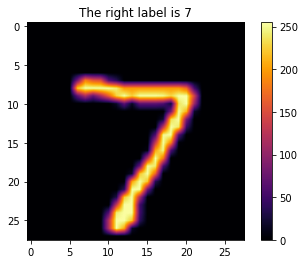

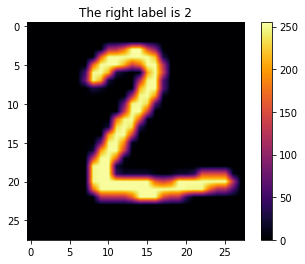

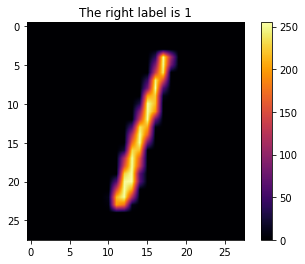

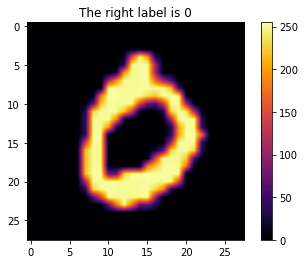

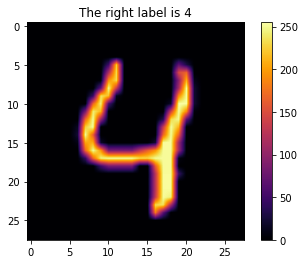

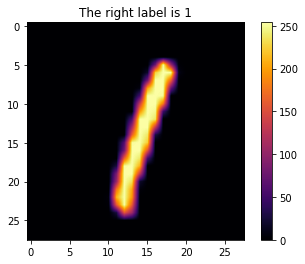

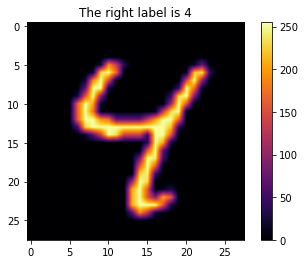

In [10]:
# Importing libraries
import matplotlib.pyplot as plt

def plot_images(images, labels):
    """Function for plotting images with thier labels.
    
    Input: list of images (list of lists) and list of labels.
    
    Output: All images in list with labels.
    
    Other: colormap is inferno and interpolation is bilinear.
    
    """
    
    # Looping through images and labels
    for i in range(len(images)):

        # Plotting the i'th image
        plt.imshow(images[i], interpolation = 'bilinear', cmap = 'inferno')

        # Adding legend
        plt.colorbar()

        # Adding title
        plt.title(f"The right label is {labels[i]}")

        # Showing plot
        plt.show()
        
''' Testing the function on the first few images from the test set'''

# Reading in test-set
test_images_ = read_images(f"{dirpath}/t10k-images.idx3-ubyte")
test_labels_ = read_labels(f"{dirpath}/t10k-labels.idx1-ubyte")

# Calling function
plot_images(test_images_[0:7], test_labels_[0:7])


The second group of tasks is to load and save existing linear classifier networks and to evaluate their performance, together with various helper functions. In the following we assume the vector b to be represented by a standard Python list of floats and the matrix A to be represented by a list-of-lists of floats.

6. Write functions linear_load(filename) and linear_save(filename, network) to load and save a linear classifier network = (A, b) using JSON. Test your functions on mnist_linear.weights.


In [11]:
# Importing libraries
import json

def linear_load(filename):
    """Function for loading a .json file - intended for networks.
    
    Input: Name of the file that we want imported.
    
    Output: The file that we want imported.
    """
    
    # Opening the file using 'with', so we dont have to close it again
    with open(filename) as infile:

        # Loading the data in the file
        indata = json.load(infile)

    # Returning the data
    return indata
    
def linear_save(filename, network):
    """Function for saving an amount of data as a .json file - intended for networks.
    
    Input: The filename we want and the data we want saved.
    
    Output: A .json file.
    """
    
    # Creating/editing the file with the specified filename
    with open(filename, 'w') as outfile:

        # Saving the data/network 
        json.dump(network, outfile)

''' Testing the functions '''
weights = linear_load(f"{dirpath}/mnist_linear.weights")
linear_save("mnist_savefile_test", weights) 


7. Write function image_to_vector(image) that converts an image (list-of-lists) with integer pixel values in the range [0, 255] to an image vector (list) with pixel values being floats in the range [0, 1].

In [12]:
def image_to_vector(image):
    """Function for turning an image into a vector.
    
    Input: An image (list of lists).
    
    Output: A vector (a list).
    """
    
    # Returning the image (list of lists) as a vector
    # Looping through each row in the image and each pixel in each row 
    # and dividing by 255 to scale everything between 0 and 1
    return [pixel/255 for row in image for pixel in row]


8. Write functions for basic linear algebra add(U, V), sub(U, V), scalar_multiplication(scalar, V) multiply(V, M), transpose(M) where V and U are vectors and M is a matrix. Include assertions to check if the dimensions of the arguments to add and multiply fit.

In [13]:
def add(U, V):
    """Function for adding two vectors.
    
    Input: Two vectors.
    
    Output: A vector, i.e. the sum of the two input vectors.
    """
    
    # Checking whether the two vectors have the same length
    assert len(U) == len(V), f"The two vectors '{U}' and '{V}' do not have the same length."

    # Loop through each element and add them together, if the assertion is passed
    return [U[i] + V[i] for i in range(len(U))]

def sub(U, V):
    """Function for subtracting two vectors.
    
    Input: Two vectors.
    
    Output: A vector, i.e. the difference of the two input vectors.
    """
    
    # Checking whether the two vectors have the same length
    assert len(U) == len(V), f"The two vectors '{U}' and '{V}' do not have the same length."
    
    # Loop through each element and subtract them, if the assertion is passed
    return [U[i] - V[i] for i in range(len(U))]
    
def scalar_multiplication(scalar, V):
    """Function for multplying a scalar with a vector.
    
    Input: A scalar and a vector.
    
    Output: A vector, i.e. the input vector with the scalar multiplied on each element of the vector.
    """
    assert isinstance(scalar, float), f"The supplied scalar of '{scalar}' is not a number."

    # Loop through each element and multiplying them with the scalar
    return [scalar * v for v in V]

def multiply(V, M):
    """Function for multplying a vector with a matrix.
    
    Input: A vector and a matrix.
    
    Output: A vector, i.e. the input vector with the scalar multiplied on each element of the vector.
    """
    
    # Checking whether the two vectors have the same length
    assert len(V) == len(M), f"The two vectors '{V}' and '{M}' do not have the same length."
    
    # Transposing the matrix for ease of indexing
    M_t = transpose(M)
    
    # Multiplying each element of the vector by each element of each row of 
    # the matrix and taking the row-wise sum
    return [sum([V[i] * M_t[row][i] for i in range(len(V))]) for row in range(len(M_t))]
        
def transpose(M):
    """Function for transposing a matrix.
    
    Input: A matrix.
    
    Output: A transposed matrix.
    """
    
    # Returning the matrix with each coordinate flipped
    return [[M[i][j] for i in range(len(M))] for j in range(len(M[0]))]


9. Write a function mean_square_error(U, V) to compute the mean squared error between two vectors.

In [14]:
def mean_square_error(U, V):
    """Function for finding the mean squared error between two vectors.
    
    Input: Two vectors of equal length.
    
    Output: The mean squared error of the two vectors.
    """
    
    # Checking whether the two vectors have the same length
    assert len(V) == len(V), f"The two vectors '{U}' and '{V}' do not have the same length."
    
    # Squaring the difference between the i'th element of the two vectors 
    # and finding the average of the squared differences
    return sum([(U[i] - V[i])**2 for i in range(len(U))])/len(U)


10. Write function a function argmax(V) that returns an index into the list V with maximal value (corresponding to numpy.argmax).

In [15]:
def argmax(V):
    """Function for finding which element of a vector has the largest value.
    
    Input: One vector.
    
    Output: The index of the largest value in the vector.
    """
    
    # Defining the temporary maximum value
    max_val = V[0]
    
    # Defining the temporary index of the maximum value
    max_index = 0
    
    # Looping through the elements of the vector
    for i in range(len(V)):
        
        # Checking if the i'th element is larger than the temporary largest element
        if V[i] > max_val:
            
            # Replacing the temporary maximum value with the new temporary maximum value
            max_val = V[i]
            
            # Replacing the temporary maximum value index with the new temporary maximum value index
            max_index = i
    
    # Returning the index of the maximum value
    return max_index


11. Implement a function categorical(label, classes=10) that takes a label from [0, 9] and returns a vector of length classes, with all entries being zero, except entry label that equals one. For an image with this label, the categorical vector is the expected ideal output of a perfect network for the image.
Example: categorical(3) should return [0,0,0,1,0,0,0,0,0,0].

In [16]:
def categorical(label, classes = 10):
    """Function for creating a vector with 0's in all but one entrance where there will be a 1.
    
    Input: The desired place of the 1 (label), and the desired length of the output vector (classes).
    
    Output: A vector of length = classes with all 0's except for one 1.
    """
    
    # Creating a list of all 0's
    lst = [0 for _ in range(classes)]
    
    # Changing the desired element to a 1
    lst[label] = 1
    
    # Returning the list
    return lst

''' Testing the function with the given example'''
assert categorical(3) == [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], f"categorical(3) did not return the right list, returning {categorical(3)} instead."
print(categorical(3))


[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


12. Write a function predict(network, image) that returns xA + b, given a network (A, b) and an image vector.

In [17]:
def predict(network, image):
    """Function for finding a network's prediction of an image.
    
    Input: A network and an image vector (list of lists).
    
    Output: A the output from the network given the image.
    """
    
    # Multiplying the image vector with the network weights, which are stored in network[0]
    mult = multiply(image, network[0])
    
    # Adding the network biases, which are stored in network[1], and returning the resulting vector
    return add(mult, network[1])


13. Create a function evaluate(network, images, labels) that given a list of image vectors and corresponding labels, returns the tuple (predictions, cost, accuracy), where predictions is a list of the predicted labels for the images, cost is the average of mean square errors over all input-output pairs, and accuracy the fraction of inputs where the predicted labels are correct. Apply this to the loaded network and the 10.000 test images in t10k-images. The accuracy should be around 92%, whereas the cost should be 230 (the cost is very bad since the network was trained to optimze the cost measure softmax).
Hint. Use your argmax function to convert network output into a label prediction.

In [18]:
def evaluate(network, images, labels):
    """Function for evaluating a network's performance on a set of test-images and test-labels.
    
    Input: A network, a list of image vectors and a list of labels.
    
    Output: A tuple of predictions, cost of the network and the accuracy of the network.
    """
    
    # Assertion statements pertaining to network type (tuple) and length (2)
    assert isinstance(network, (tuple,list)), f"The supplied network is not the right format, being a(n) '{type(network)}'. It should be either a tuple or a list."
    assert len(network) == 2, f"The length of network is '{len(network)}'. It should be 2."

    # Assertion statements pertaining to images and labels as lists
    assert isinstance(images, list), f"The supplied 'images' object is not the right format, being a(n) '{type(images)}'. It should be a list."
    assert isinstance(labels, list), f"The supplied 'labels' object is not the right format, being a(n) '{type(labels)}'. It should be a list."

    # Initialize empty lists  
    predictions = []
    accuracies = []
    costs = []
    
    # Looping through each image
    for i in range(len(images)):
        
        # Converting the image to a vector
        vec_image = image_to_vector(images[i])
        
        # Predicting an image given the network
        pred_vec = predict(network, vec_image)
        
        # Finding the maximum value of the network's prediction
        prediction = argmax(pred_vec)
        
        # Saving the prediction
        predictions.append(prediction)
        
        # Saving the cost of the prediction
        costs.append(mean_square_error(pred_vec, categorical(labels[i])))
        
        # Appending the accuracy (1 or 0) depending on correct/incorrect
        if prediction == labels[i]:
            accuracies.append(1)
        else:
            accuracies.append(0)
    
    # Returning tuple with predictions, cost of network (average cost) and accuracy
    return tuple([predictions, sum(costs)/len(costs), sum(accuracies)/len(accuracies)])
 
''' Testing the function '''
# Loading in pretrained weights
loaded_network = linear_load(f"{dirpath}/mnist_linear.weights")

# Evaluating on the test-set with the pretrained network
evalv = evaluate(loaded_network, test_images_, test_labels_)

# Asserting the cost
assert evalv[1] < 231, f"The loaded network did not perform up to par with the cost of ~230 as predicted, returning {evalv[1]}% instead."
print(f"The network returns a cost of {evalv[1]} as predicted.")

# Asserting the accuracy
assert evalv[2] < 93, f"The loaded network did not perform up to par with the ~92% accuracy as predicted, returning {evalv[2]}% instead."
print(f"The network returns an accuracy of of {evalv[2]} as predicted.")

The network returns a cost of 230.27520330872153 as predicted.
The network returns an accuracy of of 0.926 as predicted.


14. Extend plot_images to take an optional argument prediction that is a list of predicted labels for the images, and visualizes if the prediction is correct or wrong. Test it on a set of images from t10k-images and their correct labels from t10k-labels.


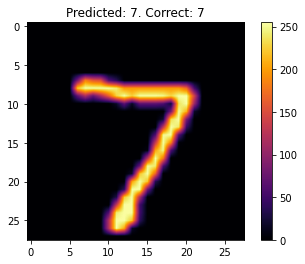

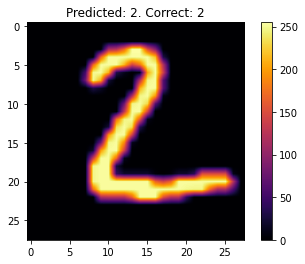

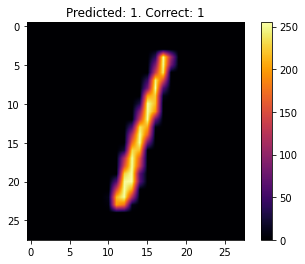

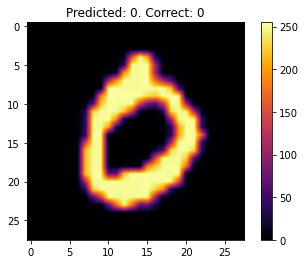

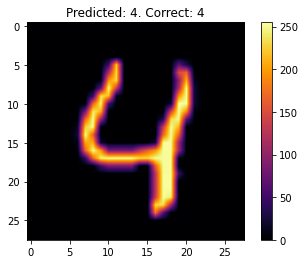

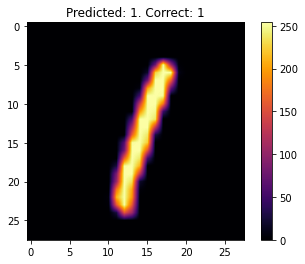

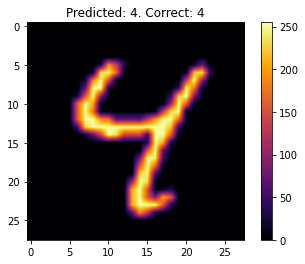

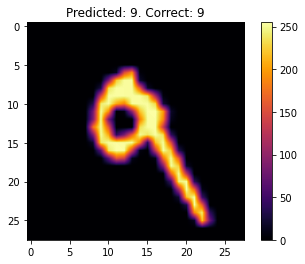

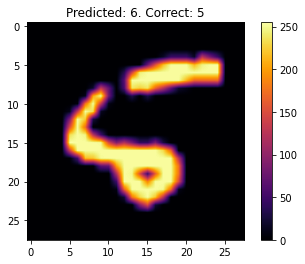

In [19]:
def plot_images(images, labels, pred_labels = False):
    """
    Function for plotting images (list of lists) with thier labels (both predicted and and correct labels).
    
    Input: list of images, list of labels and (optional) a list of predicted labels.
    
    Output: All images in list with labels (both predicted and correct labels if supplied).
    
    Other: Colormap is inferno and interpolation is bilinear.
    """

    # Assertion statements pertaining to images and labels as lists
    assert isinstance(images, list), f"The supplied 'images' object is not the right format, being a(n) '{type(images)}'. It should be a list."
    assert isinstance(labels, list), f"The supplied 'labels' object is not the right format, being a(n) '{type(labels)}'. It should be a list."

    # Looping through all images
    for i in range(len(images)):

        # Plotting the i'th image
        plt.imshow(images[i], interpolation = 'bilinear', cmap = 'inferno')
        
        # Adding legend
        plt.colorbar()
        
        # Adding labels
        plt.title(labels[i])
        
        if pred_labels:
            
            # Changing labels if predicted labels are supplied
            plt.title(f'Predicted: {pred_labels[i]}. Correct: {labels[i]}')
            
        # Showing the image
        plt.show()

''' Testing the function '''
plot_images(test_images_[0:9], test_labels_[0:9], evalv[0][0:9])


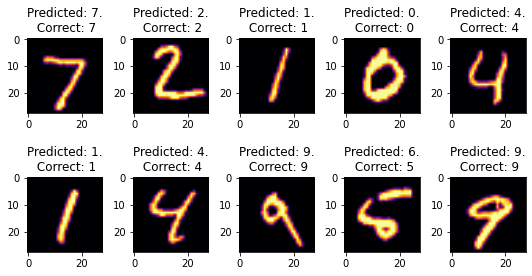

In [20]:
# ALTERNATIVE SOLUTION (printing plots in a grid for a nicer visual)

# Importing libraries
import matplotlib.pyplot as plt

def plot_images_grid(images, labels, pred_labels = False):
    '''
    Function for plotting images (list of lists) with their labels (both predicted and and correct labels), - however, this time in a grid.
    
    Input: list of images, list of labels and (optional) a list of predicted labels.
    
    Output: All images in list with labels (both predicted and correct labels if supplied).
    
    Other: Colormap is inferno and interpolation is bilinear.

    Other: Fixed here that we want to plot 10 digits. 

    # Code from: https://medium.com/the-data-science-publication/how-to-plot-mnist-digits-using-matplotlib-65a2e0cc068#:~:text=Plotting%20a%20single%20MNIST%20digit,the%20command%20that%20created%20it.

    '''
    # Fixing that we want to show the first 10 pictures
    num_row = 2
    num_col = 5

    # Plot images
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
            

    for i in range(10):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], interpolation = 'bilinear', cmap='inferno')
        
        if pred_labels:
            
            # Changing labels if predicted labels are supplied
            ax.set_title(f'Predicted: {pred_labels[i]}.\n Correct: {labels[i]}')
        else:
            ax.set_title('Label: {}'.format(labels[i]))

    # Configuring layout
    plt.tight_layout()

    # Showing plot
    plt.show()

''' Testing the function '''
plot_images_grid(test_images_[0:10], test_labels_[0:10], evalv[0][0:10])


15. Column i of matrix A contains the (positive or negative) weight of each input pixel for class i, i.e. the contribution of the pixels towards the image showing the digit i. Use imshow to visualize each column (each column is a vector of length 784 that should be reshaped to an image of size 28 × 28).

In [21]:
def plot_weights(weights):
    """Function for plotting weights (list of lists) of a network.
    
    Input: The weights of a network.
    
    Output: All weights plotted.
    
    Other: Colormap is inferno and interpolation is bilinear.
    """
    
    # We want the weights of the 10 digits 
    for i in range(10):
        
        # Plotting the data 
        plt.imshow(list(list_split([row[i] for row in weights], 28)), 
                   interpolation ='bilinear', 
                   cmap = 'inferno')
        
        # Adding the colorbar legend
        plt.colorbar()
        
        # Adding title
        plt.title(f"Weights for digit '{i}'")  
        
        # Showing the image
        plt.show()



16. Create function create_batches(values, batch_size) that partitions a list of values into batches of size batch_size, except for the last batch, that can be smaller. The list should be permuted before being cut into batches.
Example: create_batches(list(range(7)), 3) could return [[3, 0, 1], [2, 5, 4], [6]].

In [22]:
# Importing libraries
import random

# Inspiration for random-function: https://stackoverflow.com/questions/22842289/generate-n-unique-random-numbers-within-a-range

def create_batches(values, batch_size):
    """Function for creating batches.
    
    Input: A list of values and the desired size of each batch (except the last).
    
    Output: A list of batches in random order.
    """
    
    # Permuting the input values
    perm = random.sample(range(len(values)),len(values)) 
    
    batch = []
    
    while len(perm) >= batch_size:
        batch.append(perm[0:batch_size])
        
        perm = perm[batch_size:]
    
    if perm:
        batch.append(perm)
    
    # Returning the permutated list divided into batches
    return batch

''' Testing the function '''
create_batches(list(range(7)),3)

[[3, 2, 4], [0, 1, 5], [6]]

17. Create a function update(network, images, labels) that updates the network network = (A, b) given a batch of n image vectors and corresponding output labels (performs one step of a stochastical gradient descend in the 784 · 10 + 10 = 7850 dimensional space where all entries of A and b are considered to be variables).

For each input in the batch, we consider the tuple (x, a, y), where x is the image vector, a = xA + b the current network's output on input x, and y the corresponding categorical vector for the label. The biases b and weights A are updated as follows:

bj −= σ · (1 / n) · ∑(x,a,y) 2 · (aj − yj) / 10

Aij −= σ · (1 / n) · ∑(x,a,y) xi · 2 · (aj − yj) / 10

For this problem an appropriate value for the step size σ of the gradient descend is σ = 0.1.
In the above equations 2 · (aj −yj) / 10 is the derivative of the cost function (mean squared error) wrt. to the output aj, whereas xi · 2 · (aj − yj) / 10 is the derivative of the cost function w.r.t. to Aij — both for a specific image (x, a, y).

In [23]:
def update(network, images, labels):
    """Function for updating a neural network given a list of images and a list of labels.
    
    Input: A network consisting of weights and biasis, a list of images, and a list og labels.
    
    Output: A network consisting of weights and biasis updated given the images and labels.
    """
    
    # Assertion statements pertaining to network type (tuple) and length (2)
    assert isinstance(network, (tuple,list)), f"The supplied network is not the right format, being a(n) '{type(network)}'. It should be either tuple or a list."
    assert len(network) == 2, f"The length of network is '{len(network)}'. It should be 2."

    # Assertion statements pertaining to images and labels as lists
    assert isinstance(images, list), f"The supplied 'images' object is not the right format, being a(n) '{type(images)}'. It should be a list."
    assert isinstance(labels, list), f"The supplied 'labels' object is not the right format, being a(n) '{type(labels)}'. It should be a list."

    # Step size is 0.1
    sigma = 0.1
    
    # N is the length of images and labels
    n = len(labels)
    
    # initiating empty lists
    image_vecs = []
    predictions = []
    categories = []
    
    # Looping through each image/label
    for i in range(n):

        # Create the image vector of each image
        image_vec = image_to_vector(images[i])
        
        # Creating predictions for each image
        prediction = predict(network, image_vec)
        
        # Creating the 'correct' predictions for each image
        category = categorical(labels[i])
        
        # Saving the image vector
        image_vecs.append(image_vec)
        
        # Saving the predictions
        predictions.append(prediction)
        
        # Saving the 'correct' answers
        categories.append(category)
    
    # Saving the image vectors, predictions, and 'correct' predictions in a tuple
    tub = (image_vecs, predictions, categories)
    
    ### Updating the biases ###
    
    # Looping through the bias for each digit
    for bias in range(len(network[1])): # 0:9
        
        # Calculating the prediction error
        pred_error = [2 * (tub[1][image][bias] - tub[2][image][bias]) / 10 for image in range(n)]
        
        # Updating the biases by subtracting the mean prediction error times the stepsize 
        # from the bias before the update
        network[1][bias] -= sigma * sum(pred_error) / n
    
    # -------- Updating weights from here -------- #
    
    # Looping throug the weights for each pixel in the network
    for i in range(len(network[0])): # 0:783
        
        # Looping though the weight of each pixel on each digit
        for j in range(len(network[0][i])): # 0:9
            
            # Calculating the prediction error 
            pred_error = [tub[0][image][i] * 2 * (tub[1][image][j] - tub[2][image][j]) / 10 for image in range(n)]
            
            # Updating weights by subtracting the mean prediction error times the stepsize 
            # from the weights before the update
            network[0][i][j] -= sigma * sum(pred_error) / n
    
    # Returning the network
    return network


18. Create a function learn(images, labels, epochs, batch_size) to train an initially random network on a set of image vectors and labels. First initialize the network to contain random weights: each value of b to be a uniform random value in [0, 1], and each value in A to be a uniform random value in [0, 1 / 784]. Then perform epochs epochs, each epoch consiting of partitioning the input into batches of batch_size images, and calling update with each of the batches. Try running your learning function with epochs=5 and batch_size=100 on the MNIST training set train-images and train-labels.
Hint. The above computation can take a long time, so print regularly a status of the current progress of the network learning, e.g. by evaluating the network on (a subset of) the test images t10k-images. Regularly save the best network seen so far.

In [24]:
# Making some empty global lists for predictions, cost and accuracy
PRED = [0]
COST = [0]
ACC = [0]
 
def learn(images, labels, epochs = 5, batch_size = 100, network = False):
    
    """Function for teaching the patterns of the input to a network.

    Prints a statement after completion of an epoch.
    
    Input: A list of images, a list labels, the desired number of epochs, the desired batch size.
    
    Output: A network that has learned given the images, labels, epochs, and batch size.
    
    Other: An optional initial network can be specified
    """

    # Reading in test-images and test-labels
    test_labels = read_labels(f"{dirpath}/t10k-labels.idx1-ubyte")
    test_images = read_images(f"{dirpath}/t10k-images.idx3-ubyte")

    # Assertion statements pertaining to images and labels as lists
    # (not making a function, because we want to see the name of the object that is of concern in the error)
    assert isinstance(images, list), f"The supplied 'images' object is not the right format, being a(n) '{type(images)}'. It should be a list."
    assert isinstance(labels, list), f"The supplied 'labels' object is not the right format, being a(n) '{type(labels)}'. It should be a list."
    assert isinstance(images, list), f"The supplied 'images' object is not the right format, being a(n) '{type(images)}'. It should be a list."
    assert isinstance(labels, list), f"The supplied 'labels' object is not the right format, being a(n) '{type(labels)}'. It should be a list."

    # Print some space for readability in the output
    print("_____________________________________________________________________")
    print("........................INITIALIZING TRAINING........................")
    print("_____________________________________________________________________")

    # Initializing network if there is no input network
    if not network:

        # Initializing random weights by a uniform distribution 
        weight = [[random.uniform(0,1/784) for _ in range(10)] for __ in range(784)]
        
        # Initializing random values for bias by a uniform distribution
        bias = [random.uniform(0,1) for _ in range(10)]
        
        # The network consists of the two lists of respectively weights and biases (just made)
        network = [weight, bias]
    
    # Looping through each epoch
    for epoch in range(epochs):
        
        # Defining the batches in each epoch
        batches = create_batches(range(len(labels)), batch_size)
        
        # Looping though the values in each batch
        for i in range(len(batches)):
            
            # Subsetting images and labels
            batch_images, batch_labels = [images[j] for j in batches[i]], [labels[j] for j in batches[i]]

            # Calling evaluate to get the network's performance
            evalue = evaluate(network, test_images, test_labels)

            # If the performance of the current network is higher than the maximum value in the accuracy-list 
            # then save a fitting filename and the network itself to this file 
            # (adding 1 to epoch and i for readability, since both start at 0)
            if max(ACC) < evalue[2]:
                filename = f'{dirpath}/MNIST_networks/' + 'network' + str(epoch+1) + '_' + str(i+1) + '.json'

            # Saving the network after each batch (for plotting later) using our function linear_save()
                linear_save(filename, network)

            # Appending predictions, cost and accuracy
            PRED.append(evalue[0])
            COST.append(evalue[1])
            ACC.append(evalue[2])

            # Updating the network given the batch images and labels
            network = update(network, batch_images, batch_labels)

            # We want to print a status of the accuracy so far every 10th batch
            if i != 0 and i%10 == 0:
                print(f"Completed batch {i}/{len(batches)} in epoch {epoch+1}. Current accuracy is {ACC[-1]}%")

        print(f"Completed epoch {epoch+1}/{epochs}.")
            
    # Returning the network
    return network

# Reading in train labels and images
train_labels = read_labels(f"{dirpath}/train-labels.idx1-ubyte")
train_images = read_images(f"{dirpath}/train-images.idx3-ubyte")

# Running the network with default settings: epochs = 5, batchsize = 100
net = learn(train_images, train_labels, 5, 100)

# After running, we delete the first element of the three global lists since they were initilized with a 0
del PRED[0]
del COST[0]
del ACC[0]

The magic number is indeed 2049, as it should.
There are 60000 items in the file /Users/pernillebrams/Desktop/UNI/PythonKursus/Python_Assignments/MNIST/train-labels.idx1-ubyte.
The magic number is indeed 2051, as it should.
There are 60000 items in the file /Users/pernillebrams/Desktop/UNI/PythonKursus/Python_Assignments/MNIST/train-images.idx3-ubyte.
There are 28 rows in each image.
There are 28 columns in each image.
The magic number is indeed 2049, as it should.
There are 10000 items in the file /Users/pernillebrams/Desktop/UNI/PythonKursus/Python_Assignments/MNIST/t10k-labels.idx1-ubyte.
The magic number is indeed 2051, as it should.
There are 10000 items in the file /Users/pernillebrams/Desktop/UNI/PythonKursus/Python_Assignments/MNIST/t10k-images.idx3-ubyte.
There are 28 rows in each image.
There are 28 columns in each image.
_____________________________________________________________________
........................INITIALIZING TRAINING........................
________________

KeyboardInterrupt: 

20. Optional. Visualize the changing weights, cost, and accuracy during the learning.

Hint. You can use matplotlib.animation.FuncAnimation, and let the provided function apply one batch of training data to the network for each call.

The newest file with the best network is: 
 /Users/pernillebrams/Desktop/UNI/PythonKursus/Python_Assignments/MNIST/MNIST_networks/network1_1.json . 
 This file will be retrieved. 
The newest file with the best network is: 
 /Users/pernillebrams/Desktop/UNI/PythonKursus/Python_Assignments/MNIST/MNIST_networks/network1_1.json . 
 This file will be retrieved. 


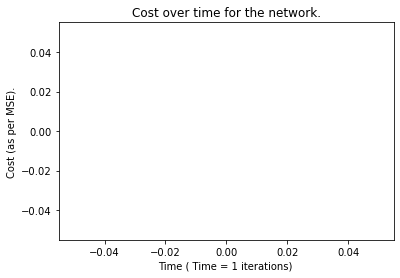

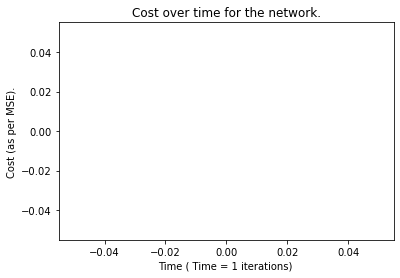

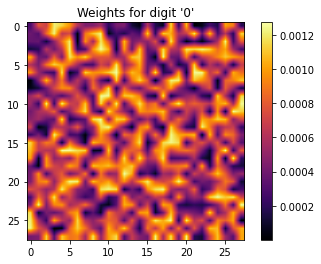

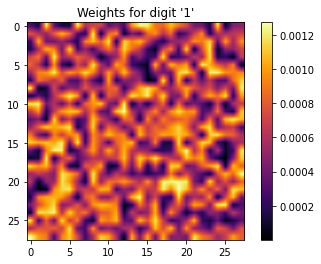

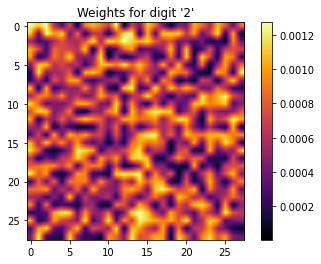

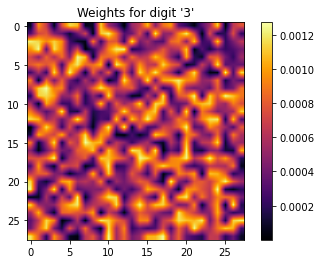

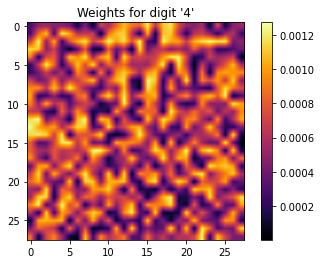

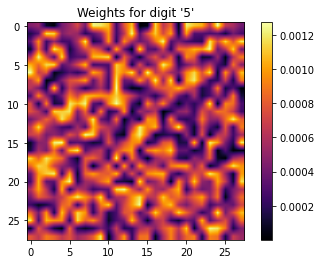

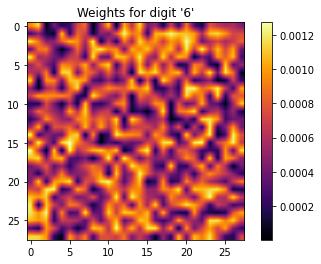

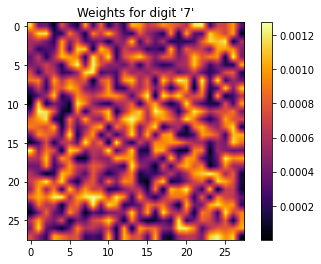

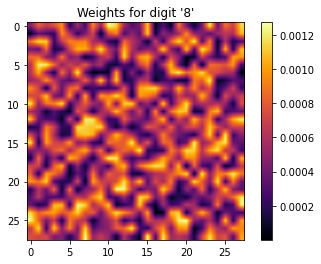

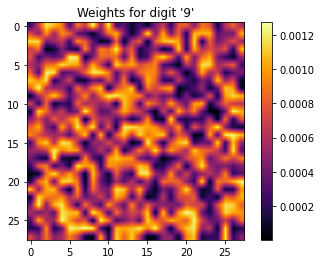

In [25]:
'''
Optional problem 20.: 

First, we visualize accuracy and cost over time (total iterations) and visualize the weights of the best network gotten.

In the following chunks after this one, we have made functions to configure GIFs of the weights during training. Se docstrings pertaining to those chunks.

'''

# Importing libraries
import matplotlib.pyplot as plt
import glob
import os


def get_best_network():
    '''Function for loading in the best network, which will be the newest file in the folder.
    '''
    # Code from: https://stackoverflow.com/questions/39327032/how-to-get-the-latest-file-in-a-folder

    # Getting a list of all .json files in directory (all saved networks)
    list_of_files = glob.glob(f'{dirpath}/MNIST_networks/*.json')

    # Getting the latest made file, which will have the highest accuracy of all
    latest_file = max(list_of_files, key=os.path.getctime)

    print(f"The newest file with the best network is: \n {latest_file} . \n This file will be retrieved. ")

    return latest_file

def plot_metrics(metric,network_name):
    '''Function for plotting accuracy over time. 

    Time is herein defined as total iterations. This means all iterations across all epochs.
    (The default case, which we have opted for, is 5 epochs and a batchsize of 100.
    This results in - with a training dataset of 60.000 images - 60000/100*5 = 3000 iterations.)

    Input: List of saved metrics from a network (e.g. "ACC" or "COST") and the network, e.g. the output of get_best_network().

    Output: Plot of metric over time. '''

    # Configuring axis length of the plot, such that the x-axis is total iterations long. 
    x_axis_length = list(range(0,len(metric))) 

    # Adding a title, axis-labels and color
    if metric == ACC:
        plt.title(f"Accuracy in % over time for the network. \n The network with the best accuracy is: {network_name.rsplit('/', 1)[1]}, in epoch {network_name.rsplit('/', 1)[1][7]}, iteration {network_name.rsplit('/', 1)[1][9:len(network_name)].rsplit('.',1)[0]}.") 
        plt.ylabel("Accuracy in %") 
        color = 'blue'

    if metric == COST:
        plt.title(f"Cost over time for the network.")
        plt.ylabel("Cost (as per MSE).")
        color = 'orange'

    # Configuring x-axis
    plt.xlabel(f"Time ( Time = {len(x_axis_length)} iterations) ")

    # Plotting
    plt.plot(x_axis_length,metric,color)
    plt.show()

'''Using the functions to visualize. '''

# With a function to retrieve the name of the file with the best network,
# we load it in with our functions
network_best = linear_load(get_best_network())

# Defining weights and biases
best_weights = network_best[0]
best_bias = network_best[1]

network_name = get_best_network()

# Plotting the final visualizations
plot_metrics(ACC, network_name)
plot_metrics(COST, network_name)

# Plotting the weights for each class
plot_weights(best_weights)



In [26]:
def save_weights(weights, filename):
    """Function for saving the weights of a network as images - one image for each digit.
    
    Input: The weights of a network and the desired filename excluding the file extention.
    
    Output: Saves the weights of a network as .png images with the desired filename.
    """
    
    # We want to save the the weights of all ten digits
    for i in range(len(weights[0])):
        
        # Formatting the weights
        data = list(list_split([row[i] for row in weights], 28))
        
        # Saving the images
        plt.imsave(filename + str(i) + '.png', data, cmap = 'inferno')


In [27]:
"""Chunk for creating images from networks and collecting images as gifs.

Please have a folder with networks in your working directory called 'MNIST_networks'.
"""

# Importing modules
import os, json, imageio
import pandas as pd

# Defining path where the networks are located
path_to_json = f'{dirpath}/MNIST_networks/'

# Getting list of network filenames
# Inspired by https://stackoverflow.com/questions/30539679/python-read-several-json-files-from-a-folder
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

# Soring the networks, so the images in the gifs have the correct order
json_files.sort()

# Adding path to the networks
json_files = [f'{dirpath}/MNIST_networks/' + file for file in json_files]

# Loading the networks
weights_animate = list(map(linear_load, json_files))

# Looping through all the networks
for i in range(len(weights_animate)):
    
    # Creating path if not already there
    newpath = f'{dirpath}/MNIST_pictures/'
    
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    
    # Adding one or two 0's for sorting purposes
    if len(str(i)) == 1:
        filename = f'{dirpath}/MNIST_pictures/0' + str(i) + 'picture'
    if len(str(i)) == 2:
        filename = f'{dirpath}/MNIST_pictures/' + str(i) + 'picture'
    
    # Indexing the weights
    weights = weights_animate[i][0]
    
    # Saving the images of the weights
    save_weights(weights, filename)

# Looping through the 10 digits
for j in range(10):
    
    # Defining the path to the images
    path_to_image = f'{dirpath}/MNIST_pictures/'
    
    # Getting list of image filenames
    # Inspired by https://stackoverflow.com/questions/30539679/python-read-several-json-files-from-a-folder
    png_files = [pos_png for pos_png in os.listdir(path_to_image) if pos_png.endswith(str(j) + '.png')]
    
    # Sorting to insure the images in the gifs are in the correct order
    png_files.sort()
    
    # Making the gifs using 
    # Inspired by https://stackoverflow.com/questions/753190/programmatically-generate-video-or-animated-gif-in-python
    with imageio.get_writer(f'{dirpath}/MNIST_pictures/gif' + str(j) + '.gif', mode = 'I') as writer:
        
        # Looping through filenames
        for filename in png_files:
            
            # Reading images
            image = imageio.imread(f'{dirpath}/MNIST_pictures/' + filename)
            
            # Append images to gifs
            writer.append_data(image)